<a href="https://colab.research.google.com/github/Pramsi/Can-t_tame_that_Python_Semester_Project/blob/multi-label-classification_try/Kopie_von_Can't_tame_that_Python_Semester_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [87]:
#for data manipulation
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Other tooling
import os

#NLP
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
!pip install --upgrade emoji
import emoji
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#Import Datafiles

In [29]:
# create kaggle directory and add kaggle.json
from google.colab import files
files.upload()

! mkdir -p ~/.kaggle #create kaggle directory
! mv kaggle.json ~/.kaggle/ #move json file there
! chmod 600 ~/.kaggle/kaggle.json #change permission of the file

Saving kaggle.json to kaggle.json


In [30]:
#create gitignore and add kaggle
%%writefile .gitignore
.kaggle/

Overwriting .gitignore


In [ ]:
#upload brexit dataset
!kaggle datasets download -d visalakshiiyer/twitter-data-brexit
! mkdir brexitTweets #create folder with files
! unzip twitter-data-brexit.zip -d brexitTweets #unzip data and save in folder

In [32]:
!ls -a



.  ..  brexitTweets  .config  .gitignore  sample_data  twitter-data-brexit.zip


In [33]:
#Load Datasets
dfAnti = pd.read_csv("brexitTweets/TweetDataset_AntiBrexit_Jan-Mar2022.csv")
dfPro = pd.read_csv("brexitTweets/TweetDataset_ProBrexit_Jan-Mar2022.csv")

In [34]:
#Check Data
dfAnti.head()

,Unnamed: 0,Date,Headline,URL,Opening Text,Hit Sentence,Source,Influencer,Country,Subregion,...,Twitter Screen Name,User Profile Url,Twitter Bio,Twitter Followers,Twitter Following,Alternate Date Format,Time,State,City,Document Tags
0,0,09-Jan-2022 11:58PM,NaN,https://twitter.com/nickynicky77551/statuses/1...,NaN,"RT @cnapan: #JohnsonOut is now running at 218,...",Twitter,@nickynicky77551,Unknown,NaN,...,nicky@nicky7755,https://twitter.com/nickynicky77551,"Ardent Remainer; Rejoiner now, Support NHS 💙 #...",1697.0,2576.0,"Jan 9, 2022",11:58 PM,NaN,NaN,NaN
1,1,09-Jan-2022 11:58PM,NaN,https://twitter.com/lines12345/statuses/148032...,NaN,RT @Femi_Sorry: My point: Any Labour leader wh...,Twitter,@lines12345,Unknown,NaN,...,Helen,https://twitter.com/lines12345,Tory hating Remainer,11.0,92.0,"Jan 9, 2022",11:58 PM,NaN,NaN,NaN
2,2,09-Jan-2022 11:58PM,NaN,https://twitter.com/millymoo97/statuses/148032...,NaN,RT @andy_murray: QT @Nigel_Farage: Please reco...,Twitter,@millymoo97,Unknown,NaN,...,seonaid mcgill,https://twitter.com/millymoo97,"Scottish, European, anti-Brexit, pro-EU, freel...",2129.0,3880.0,"Jan 9, 2022",11:58 PM,NaN,NaN,NaN
3,3,09-Jan-2022 11:58PM,NaN,https://twitter.com/ValueSurplus/statuses/1480...,NaN,RT @mikegalsworthy: We’re the first country in...,Twitter,@valuesurplus,United Kingdom,NaN,...,Rightwing politics is a social virus #BLM 🇵🇸🌈,https://twitter.com/ValueSurplus,Classical Cultural Marxist.\nAnti Brexit estab...,2420.0,4952.0,"Jan 9, 2022",11:58 PM,NaN,NaN,NaN
4,4,09-Jan-2022 11:57PM,NaN,https://twitter.com/Jackcdawes/statuses/148032...,NaN,"RT @StevePeers: QT @andy_murray: Game, set and...",Twitter,@jackcdawes,United Kingdom,NaN,...,Jack Dawes #FBPEGlobal #JohnsonOut #RejoinEU,https://twitter.com/Jackcdawes,"Lover of crime & horror fiction, history, & Me...",18304.0,19889.0,"Jan 9, 2022",11:57 PM,England,London,NaN


#Preprocessing

In [128]:
# label pro and anti tweets and concatenate the two files
dfAnti['Position'] = 0
dfPro['Position'] = 1

df = pd.concat([dfAnti, dfPro])

#drop unwanted data
df.drop(['Unnamed: 0', 'Date', 'Headline', 'URL', 'Opening Text', 'Source', 'Influencer', 'Country', 'Subregion', 'Language', 'Reach', 'Desktop Reach', 'Mobile Reach', 'Twitter Social Echo', 'Facebook Social Echo', 'Reddit Social Echo', 'National Viewership', 'Engagement', 'AVE', 'Key Phrases', 'Input Name', 'Keywords', 'Twitter Authority', 'Tweet Id', 'Twitter Id', 'Twitter Client', 'Twitter Screen Name', 'User Profile Url', 'Twitter Bio', 'Twitter Followers', 'Twitter Following', 'Alternate Date Format', 'Time', 'State', 'City', 'Document Tags'], axis = 1, inplace=True)

#count the data
df.Position.value_counts()

0    210574
1    147631
Name: Position, dtype: int64

In [36]:
#Clean Hit Sentence - Remove Retweets
df_no_rt = df[df['Hit Sentence'].str.contains("RT @")==False]
df_no_qt = df_no_rt[df_no_rt['Hit Sentence'].str.contains("QT @")==False]

#how many tweets were retweeted and qoted?
print(f'Amount of retweets and quote tweets in percentage:{round(100*(1-len(df_no_qt)/len(df)),1)}%')
print(df_no_qt)

Amount of retweets and quote tweets in percentage:78.8%
                                             Hit Sentence Sentiment  Position
7       @JayneMonie1 @HowardJ91352838 @davesumnersmith...   Neutral         0
17      @MPIainDS You have made it nigh on impossible ...   Neutral         0
21      @TheGhos72578902 @SallyAnnC3 @AndieHalihan @Ch...   Neutral         0
36      @snb19692 FPTP - totally discredited! Not leas...  Negative         0
39      @pauld4dog @jarviboy1974uk @LloydHardy Superma...   Neutral         0
...                                                   ...       ...       ...
147604  @sandieshoes We did have a fight, for years, t...   Neutral         1
147610  @ExpoSpurs He’s just another pathetic sneering...  Negative         1
147613  #BorisJohnsonOut inthegardenforaparty it’s not...   Neutral         1
147626  @JamesRobvincent @7nestingwrens He was also fi...   Neutral         1
147628  Ludicrous to suggest Boris is insulting Ukrain...  Negative         1

[76098 

In [37]:
#How many Pro and Anti Tweets are left
df_no_qt.Position.value_counts()

1    40387
0    35711
Name: Position, dtype: int64

In [38]:
#Preprocess Helper Functions

#to lower case
def lowercase(tweet: str) -> str:
  preprocessedTweet = str.lower(tweet)
  return preprocessedTweet

#remove hashtags
def remove_hashtags(tweet: str) -> str:
  preprocessedTweet = re.sub('#[a-zA-Z0-9_]+','',tweet)
  return preprocessedTweet

#remove mentions
def remove_mentions(tweet: str) -> str:
  preprocessedTweet = re.sub('@[a-zA-Z0-9_]+','',tweet)
  return preprocessedTweet

#remove emojis
def remove_emojis(tweet: str) -> str:
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub('', tweet)

#remove stopwords
def remove_stopwords(tweet: str) -> str:
    word_list = tweet.split()
    filtered_words = [word for word in word_list if word not in set(stopwords.words('english'))]
    return ' '.join(filtered_words)

# Function to combine all preprocessing steps
def preprocess_tweet(tweet: str) -> str:
    tweet = lowercase(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_mentions(tweet)
    tweet = remove_stopwords(tweet)
    tweet = remove_emojis(tweet)
    return tweet

In [39]:
# no retweets and no quote tweets / no cleaned column yet
df_no_qt.head()

,Hit Sentence,Sentiment,Position
7,@JayneMonie1 @HowardJ91352838 @davesumnersmith...,Neutral,0
17,@MPIainDS You have made it nigh on impossible ...,Neutral,0
21,@TheGhos72578902 @SallyAnnC3 @AndieHalihan @Ch...,Neutral,0
36,@snb19692 FPTP - totally discredited! Not leas...,Negative,0
39,@pauld4dog @jarviboy1974uk @LloydHardy Superma...,Neutral,0


In [41]:
# create cleaned tweet column
df_no_qt['tweet_clean'] = df_no_qt['Hit Sentence'].apply(preprocess_tweet)

<ipython-input-41-7e9d578539c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_qt['tweet_clean'] = df_no_qt['Hit Sentence'].apply(preprocess_tweet)


In [42]:
# with cleaned tweet column
df_no_qt.head()

,Hit Sentence,Sentiment,Position,tweet_clean
7,@JayneMonie1 @HowardJ91352838 @davesumnersmith...,Neutral,0,"money’s sunak, (with gove & cummings) behind p..."
17,@MPIainDS You have made it nigh on impossible ...,Neutral,0,made nigh impossible share european funding st...
21,@TheGhos72578902 @SallyAnnC3 @AndieHalihan @Ch...,Neutral,0,haven’t wrong yet. said would lose. did. said ...
36,@snb19692 FPTP - totally discredited! Not leas...,Negative,0,fptp - totally discredited! least derisory 17....
39,@pauld4dog @jarviboy1974uk @LloydHardy Superma...,Neutral,0,supermarkets main brexit supporters quiet. bre...


#Split and Vectorize the data

In [129]:
# Set X and y label
X_preprocessed = df_no_qt["tweet_clean"]
y = df_no_qt[["Sentiment", "Position"]].values
y_list = [list(map(str, row)) for row in y]

In [130]:
# One hot encoding for multiple columns
mlb = MultiLabelBinarizer()
y_encoded = mlb.fit_transform(y_list)

In [131]:
#Check encoded y labels
class_labels = mlb.classes_

# Print out the mapping
print("Encoded Labels mapping:")
for index, original_labels in enumerate(class_labels):
    print(f"Encoded Label: {index} --> Original Label: {original_labels}")

Encoded Labels mapping:
Encoded Label: 0 --> Original Label: 0
Encoded Label: 1 --> Original Label: 1
Encoded Label: 2 --> Original Label: Negative
Encoded Label: 3 --> Original Label: Neutral
Encoded Label: 4 --> Original Label: Not Rated
Encoded Label: 5 --> Original Label: Positive


In [44]:
# Encode the y labels
#label_encoder = LabelEncoder()
#y_encoded = label_encoder.fit_transform(y)

In [ ]:
#check encoded labels
#for index, original_label in enumerate(label_encoder.classes_):
   # print(f"Encoded Label: {index} -> Original Label: {original_label}")

In [132]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y_encoded, test_size=0.3, random_state=42)

In [133]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (53268,)
X_test shape:  (22830,)
y_train shape:  (53268, 6)
y_test shape:  (22830, 6)


In [134]:
#Vectorize the data
tfidf_vectorizer = TfidfVectorizer(stop_words='english') #make sure that all stopwords are excluded, stopword list might differ
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

count_vectorizer = CountVectorizer(stop_words="english") #make sure that all stopwords are excluded
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)

#Train Models with Tfidf Vectorizer

In [ ]:
# Initialize a Support Vector Classifier (SVC) with a linear kernel
# svm_linear_tfidf = SVC(kernel='linear', C=1)

# Train the classifier using the tfidf training data and training labels
# svm_linear_tfidf.fit(tfidf_train, y_train)

In [135]:
# Initialize a Logistic Regression Model
log_reg_tfidf = OneVsRestClassifier(LogisticRegression(C=1, solver='lbfgs', max_iter=1000))
log_reg_tfidf.fit(tfidf_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1, max_iter=1000))

In [137]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_predict:", y_pred_logreg_tfidf.shape)

Shape of y_test: (22830, 6)
Shape of y_predict: (22830, 6)


In [ ]:
# Initialize a Logistic Regression Model
#log_reg_tfidf = LogisticRegression(C=1, solver='lbfgs', max_iter=1000)

#Train the Linear Regression Model using the tfidf data
#log_reg_tfidf.fit(tfidf_train, y_train)

In [51]:
# Initialize a Random Forest Classifier
random_forest_tfidf = RandomForestClassifier(max_depth=None, n_estimators=100, random_state=42)

# Fit the Random Forest Classifier on the training data
random_forest_tfidf.fit(tfidf_train, y_train)

RandomForestClassifier(random_state=42)

In [52]:
# Initialize Naive Bayes Classifier
nb_classifier_tfidf = MultinomialNB()

# Fit the Naive Bayes Classifier with the tfidf data
nb_classifier_tfidf.fit(tfidf_train, y_train)

MultinomialNB()

Make predictions with Tfidf vectorized data

In [118]:
y_pred_logreg_tfidf = log_reg_tfidf.predict(tfidf_test)

In [ ]:
# Predict the labels for the tfidf vectorized data using a linear SVM model
# y_pred_svm_tfidf = svm_linear_tfidf.predict(tfidf_test)

# Predict the labels for the tfidf vectorized data using a logistic regression model
y_pred_logreg_tfidf = log_reg_tfidf.predict(tfidf_test)

# Predict the labels for the tfidf vectorized data using a Random Forest Classifier
y_pred_forest_tfidf = random_forest_tfidf.predict(tfidf_test)

# Predict the labels for the tfidf vectorized data using a Naive Bayes Classifier
y_pred_nb_tfidf = nb_classifier_tfidf.predict(tfidf_test)

Evaluate our Models with the Tfidf vectorized data

In [94]:
print(f"Logistic Regression Evaluation:")
#Logistic Regression Evaluation
# Calculate and print the accuracy score
accuracy_logreg_tfidf = accuracy_score(y_test, y_pred_logreg_tfidf)
print(f"Accuracy: {accuracy_logreg_tfidf}")

# Calculate and print the F1 score
f1_logreg_tfidf = f1_score(y_test, y_pred_logreg_tfidf, average='macro')
print(f"F1 Score: {f1_logreg_tfidf}")

# Calculate and print the precision score
precision_logreg_tfidf = precision_score(y_test, y_pred_logreg_tfidf, average='macro')
print(f"Precision: {precision_logreg_tfidf}")

# Calculate and print the recall score
recall_logreg_tfidf = recall_score(y_test, y_pred_logreg_tfidf, average='macro')
print(f"Recall: {recall_logreg_tfidf}")

print(f"---------------------------------------------")

Logistic Regression Evaluation:
Accuracy: 0.5130091984231274
F1 Score: 0.6533698103806973
Precision: 0.7490087257930457
Recall: 0.6096744256517197
---------------------------------------------


In [ ]:
#SVM Evaluation
# print(f"SVM Evaluation:")
# Calculate and print the accuracy score
# accuracy_svm_tfidf = accuracy_score(y_test, y_pred_svm_tfidf)
# print(f"Accuracy: {accuracy_svm_tfidf}")

#  Calculate and print the F1 score
# f1_svm_tfidf = f1_score(y_test, y_pred_svm_tfidf, average='macro')
# print(f"F1 Score: {f1_svm_tfidf}")

#  Calculate and print the precision score
# precision_svm_tfidf = precision_score(y_test, y_pred_svm_tfidf, average='macro')
# print(f"Precision: {precision_svm_tfidf}")

#  Calculate and print the recall score
# recall_svm_tfidf = recall_score(y_test, y_pred_svm_tfidf, average='macro')
# print(f"Recall: {recall_svm_tfidf}")

# print(f"---------------------------------------------")

print(f"Logistic Regression Evaluation:")
#Logistic Regression Evaluation
# Calculate and print the accuracy score
accuracy_logreg_tfidf = accuracy_score(y_test, y_pred_logreg_tfidf)
print(f"Accuracy: {accuracy_logreg_tfidf}")

# Calculate and print the F1 score
f1_logreg_tfidf = f1_score(y_test, y_pred_logreg_tfidf, average='macro')
print(f"F1 Score: {f1_logreg_tfidf}")

# Calculate and print the precision score
precision_logreg_tfidf = precision_score(y_test, y_pred_logreg_tfidf, average='macro')
print(f"Precision: {precision_logreg_tfidf}")

# Calculate and print the recall score
recall_logreg_tfidf = recall_score(y_test, y_pred_logreg_tfidf, average='macro')
print(f"Recall: {recall_logreg_tfidf}")

print(f"---------------------------------------------")

print(f"Random Forest Evaluation:")
#Random Forest Evaluation
# Calculate and print the accuracy score
accuracy_forest_tfidf = accuracy_score(y_test, y_pred_forest_tfidf)
print(f"Accuracy: {accuracy_forest_tfidf}")

# Calculate and print the F1 score
f1_forest_tfidf = f1_score(y_test, y_pred_forest_tfidf, average='macro')
print(f"F1 Score: {f1_forest_tfidf}")

# Calculate and print the precision score
precision_forest_tfidf = precision_score(y_test, y_pred_forest_tfidf, average='macro')
print(f"Precision: {precision_forest_tfidf}")

# Calculate and print the recall score
recall_forest_tfidf = recall_score(y_test, y_pred_forest_tfidf, average='macro')
print(f"Recall: {recall_forest_tfidf}")

print(f"---------------------------------------------")

print(f"Naive Bayes Classifier Evaluation:")
#Logistic Regression Evaluation
# Calculate and print the accuracy score
accuracy_nb_tfidf = accuracy_score(y_test, y_pred_nb_tfidf)
print(f"Accuracy: {accuracy_nb_tfidf}")

# Calculate and print the F1 score
f1_nb_tfidf = f1_score(y_test, y_pred_nb_tfidf, average='macro')
print(f"F1 Score: {f1_nb_tfidf}")

# Calculate and print the precision score
precision_nb_tfidf = precision_score(y_test, y_pred_nb_tfidf, average='macro', zero_division=1)
print(f"Precision: {precision_nb_tfidf}")

# Calculate and print the recall score
recall_nb_tfidf = recall_score(y_test, y_pred_nb_tfidf, average='macro', zero_division=1)
print(f"Recall: {recall_nb_tfidf}")

print(f"---------------------------------------------")

#Train Models with Count Vectorizer

In [ ]:
# Initialize a Support Vector Classifier (SVC) with a linear kernel
# svm_linear_count = SVC(kernel='linear', C=1)

# Train the classifier using the tfidf training data and training labels
# svm_linear_count.fit(count_train, y_train)

In [139]:
# Initialize a Logistic Regression Model
log_reg_count = OneVsRestClassifier(LogisticRegression(C=1, solver='lbfgs', max_iter=1000))

#Train the Linear Regression Model using the tfidf data
log_reg_count.fit(count_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1, max_iter=1000))

In [57]:
# Initialize a Random Forest Classifier
random_forest_count = RandomForestClassifier(max_depth=None, n_estimators=100, random_state=42)

# Fit the Random Forest Classifier on the training data
random_forest_count.fit(count_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
# Initialize Naive Bayes Classifier
nb_classifier_count = MultinomialNB()

# Fit the Naive Bayes Classifier with the tfidf data
nb_classifier_count.fit(count_train, y_train)

MultinomialNB()

Make predictions with Count vectorized data

In [140]:
y_pred_logreg_count = log_reg_count.predict(count_test)

In [59]:
# Predict the labels for the count vectorized data using a linear SVM model
# y_pred_svm_count = svm_linear_count.predict(count_test)

# Predict the labels for the count vectorized data using a logistic regression model
y_pred_logreg_count = log_reg_count.predict(count_test)

# Predict the labels for the count vectorized data using a Random Forest Classifier
y_pred_forest_count = random_forest_count.predict(count_test)

# Predict the labels for the count vectorized data using a Naive Bayes Classifier
y_pred_nb_count = nb_classifier_count.predict(count_test)

Evaluate our Models with the Count vectorized data

In [141]:
print(f"Logistic Regression Evaluation:")
#Logistic Regression Evaluation
# Calculate and print the accuracy score
accuracy_logreg_count = accuracy_score(y_test, y_pred_logreg_count)
print(f"Accuracy: {accuracy_logreg_count}")

# Calculate and print the F1 score
f1_logreg_count = f1_score(y_test, y_pred_logreg_count, average='macro')
print(f"F1 Score: {f1_logreg_count}")

# Calculate and print the precision score
precision_logreg_count = precision_score(y_test, y_pred_logreg_count, average='macro')
print(f"Precision: {precision_logreg_count}")

# Calculate and print the recall score
recall_logreg_count = recall_score(y_test, y_pred_logreg_count, average='macro')
print(f"Recall: {recall_logreg_count}")

print(f"---------------------------------------------")

Logistic Regression Evaluation:
Accuracy: 0.5212001752080596
F1 Score: 0.5954861783446034
Precision: 0.6943042398087682
Recall: 0.5730457161904565
---------------------------------------------


In [ ]:
#SVM Evaluation
# print(f"SVM Evaluation:")
# Calculate and print the accuracy score
# accuracy_svm_count = accuracy_score(y_test, y_pred_svm_count)
# print(f"Accuracy: {accuracy_svm_count}")

# Calculate and print the F1 score
# f1_svm_count = f1_score(y_test, y_pred_svm_count, average='macro')
# print(f"F1 Score: {f1_svm_count}")

# Calculate and print the precision score
# precision_svm_count = precision_score(y_test, y_pred_svm_count, average='macro')
# print(f"Precision: {precision_svm_count}")

# Calculate and print the recall score
# recall_svm_count = recall_score(y_test, y_pred_svm_count, average='macro')
# print(f"Recall: {recall_svm_count}")

# print(f"---------------------------------------------")

print(f"Logistic Regression Evaluation:")
#Logistic Regression Evaluation
# Calculate and print the accuracy score
accuracy_logreg_count = accuracy_score(y_test, y_pred_logreg_count)
print(f"Accuracy: {accuracy_logreg_count}")

# Calculate and print the F1 score
f1_logreg_count = f1_score(y_test, y_pred_logreg_count, average='macro')
print(f"F1 Score: {f1_logreg_count}")

# Calculate and print the precision score
precision_logreg_count = precision_score(y_test, y_pred_logreg_count, average='macro')
print(f"Precision: {precision_logreg_count}")

# Calculate and print the recall score
recall_logreg_count = recall_score(y_test, y_pred_logreg_count, average='macro')
print(f"Recall: {recall_logreg_count}")

print(f"---------------------------------------------")

print(f"Random Forest Evaluation:")
#Random Forest Evaluation
# Calculate and print the accuracy score
accuracy_forest_count = accuracy_score(y_test, y_pred_forest_count)
print(f"Accuracy: {accuracy_forest_count}")

# Calculate and print the F1 score
f1_forest_count = f1_score(y_test, y_pred_forest_count, average='macro')
print(f"F1 Score: {f1_forest_count}")

# Calculate and print the precision score
precision_forest_count = precision_score(y_test, y_pred_forest_count, average='macro')
print(f"Precision: {precision_forest_count}")

# Calculate and print the recall score
recall_forest_count = recall_score(y_test, y_pred_forest_count, average='macro')
print(f"Recall: {recall_forest_count}")

print(f"---------------------------------------------")

print(f"Naive Bayes Classifier Evaluation:")
#Logistic Regression Evaluation
# Calculate and print the accuracy score
accuracy_nb_count = accuracy_score(y_test, y_pred_nb_count)
print(f"Accuracy: {accuracy_nb_count}")

# Calculate and print the F1 score
f1_nb_count = f1_score(y_test, y_pred_nb_count, average='macro')
print(f"F1 Score: {f1_nb_count}")

# Calculate and print the precision score
precision_nb_count = precision_score(y_test, y_pred_nb_count, average='macro', zero_division=1)
print(f"Precision: {precision_nb_count}")

# Calculate and print the recall score
recall_nb_count = recall_score(y_test, y_pred_nb_count, average='macro', zero_division=1)
print(f"Recall: {recall_nb_count}")

print(f"---------------------------------------------")

In [ ]:
parameters_log = {'C': [0.1, 1, 10, 100]}

# Initialize a Logistic Regression Classifier
log_reg_count = LogisticRegression(C=1, solver='lbfgs', max_iter=3000)

# Set up GridSearchCV with the SVC, parameter grid, 5-fold cross-validation, and F1 scoring
grid_log_reg_count = GridSearchCV(log_reg_count, parameters_log, cv=5, scoring="f1_macro")

# Train the GridSearchCV on the scaled training data
grid_log_reg_count.fit(count_train, y_train)

In [ ]:
print(f"Best Parameters: {grid_log_reg_count.best_params_}")
print(f"Best F1 - Score: {grid_log_reg_count.best_score_}")

In [146]:
def plot_conf_matrix_multiclass(conf_mat, classifier_name, original_label):
    #Normalize to get percentages
    conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

    # Set the size of the figure
    plt.figure(figsize=(10,7))

    # seaborn to create a heatmap of the confusion matrix
    sns.heatmap(conf_mat_normalized, annot=True, fmt='.2%', cmap='Blues',
                xticklabels=original_label, yticklabels=original_label)

    # Label the x-axis as 'Predicted'
    plt.xlabel('Predicted')

    # Label the y-axis as 'Actual'
    plt.ylabel('Actual')

    # Set the title of the plot
    plt.title(f'Confusion Matrix for {classifier_name}')

    # Display the plot
    plt.show()

In [ ]:
conf_matrix_logreg_count_multiclass = confusion_matrix(y_test, y_pred_logreg_count)

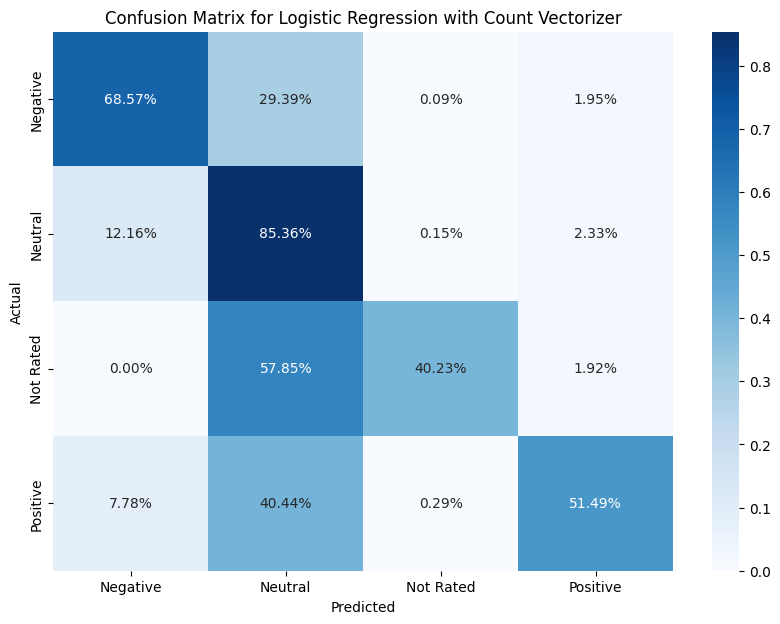

In [145]:
original_label = ["Negative", "Neutral", "Not Rated", "Positive"]
plot_conf_matrix_multiclass(conf_matrix_logreg_count_multiclass, "Logistic Regression with Count Vectorizer", original_label)

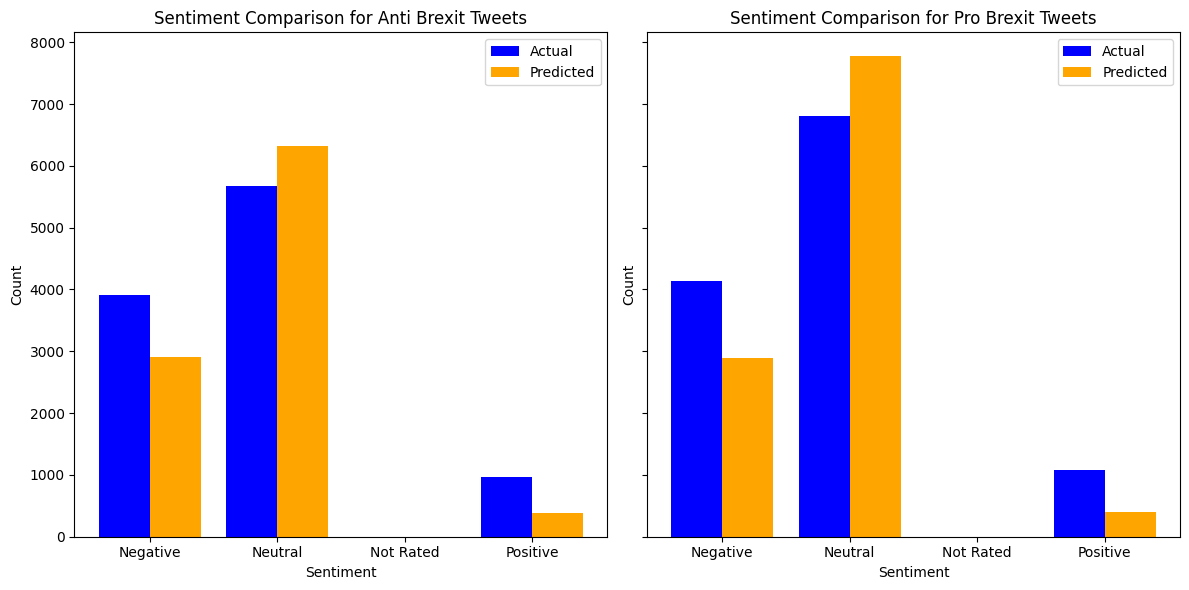

In [144]:
def visualize_model_output(y_actual, y_predict, mlb):
    # Inverse transform the actual and predicted binary matrices to the original labels
    y_actual_labels = mlb.inverse_transform(y_test)
    y_predict_labels = mlb.inverse_transform(y_pred_logreg_tfidf)

    # Create a DataFrame from the actual and predicted label tuples
    results = pd.DataFrame({
        'Actual Labels': [' '.join(map(str, labels)) for labels in y_actual_labels],
        'Predicted Labels': [' '.join(map(str, labels)) for labels in y_predict_labels]
    })

    # Extract and add the Position column (Anti or Pro Brexit) to the results DataFrame
    # Assuming the position is the second label in the MultiLabelBinarizer
    results['Position'] = ['Pro Brexit' if '1' in labels else 'Anti Brexit' for labels in results['Actual Labels']]

    # Define the sentiment labels
    sentiment_labels = ['Negative', 'Neutral', 'Not Rated', 'Positive']

    # Initialize plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

    # Plot for each position
    for position_name, ax in zip(["Anti Brexit", "Pro Brexit"], axes):
        # Filter results by position
        position_results = results[results['Position'] == position_name]

        # Count actual and predicted sentiments
        actual_sentiment_counts = pd.Series(0, index=sentiment_labels)
        predicted_sentiment_counts = pd.Series(0, index=sentiment_labels)
        for labels in position_results['Actual Labels']:
            sentiment_labels_actual = labels.split()  # Split labels into individual sentiment labels
            for label in sentiment_labels_actual:
                if label in sentiment_labels:
                    actual_sentiment_counts[label] += 1
        for labels in position_results['Predicted Labels']:
            sentiment_labels_predicted = labels.split()  # Split labels into individual sentiment labels
            for label in sentiment_labels_predicted:
                if label in sentiment_labels:
                    predicted_sentiment_counts[label] += 1

        # Plot
        ax.bar(np.arange(len(sentiment_labels)) - 0.2, actual_sentiment_counts, width=0.4, label='Actual', color='blue')
        ax.bar(np.arange(len(sentiment_labels)) + 0.2, predicted_sentiment_counts, width=0.4, label='Predicted', color='orange')
        ax.set_title(f"Sentiment Comparison for {position_name} Tweets")
        ax.set_xlabel('Sentiment')
        ax.set_xticks(ticks=np.arange(len(sentiment_labels)))
        ax.set_xticklabels(sentiment_labels)
        ax.set_ylabel('Count')
        ax.legend()

    plt.tight_layout()
    plt.show()

# You should call the function with the correct variables
visualize_model_output(y_test, y_pred_logreg_tfidf, mlb)

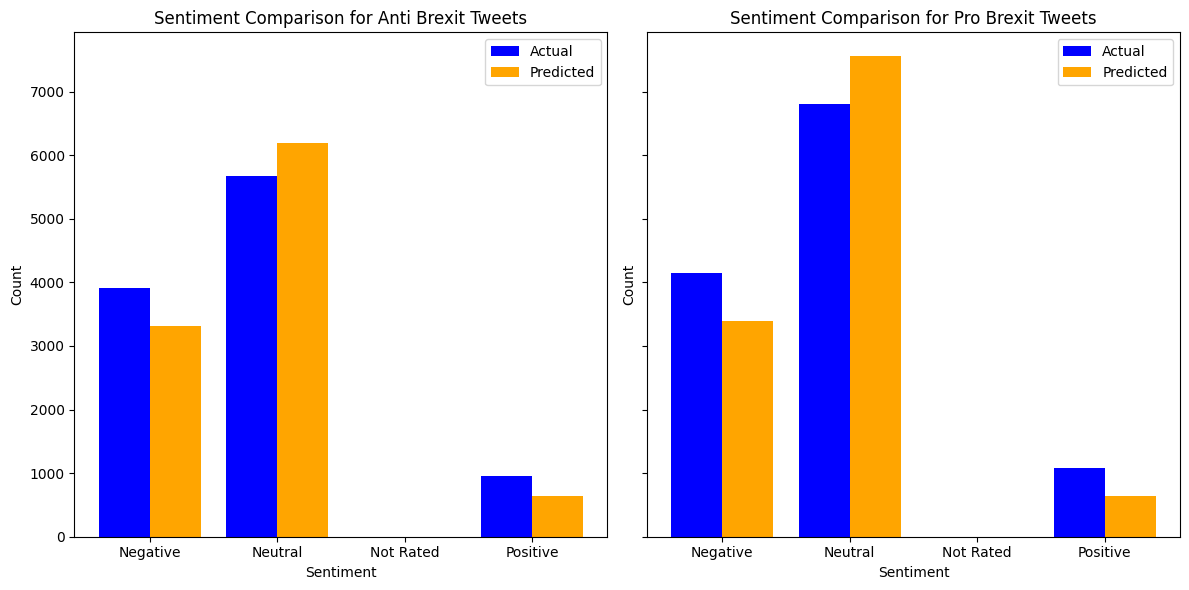

In [142]:
def visualize_model_output(y_actual, y_predict, mlb):
    # Inverse transform the actual and predicted binary matrices to the original labels
    y_actual_labels = mlb.inverse_transform(y_test)
    y_predict_labels = mlb.inverse_transform(y_pred_logreg_count)

    # Create a DataFrame from the actual and predicted label tuples
    results = pd.DataFrame({
        'Actual Labels': [' '.join(map(str, labels)) for labels in y_actual_labels],
        'Predicted Labels': [' '.join(map(str, labels)) for labels in y_predict_labels]
    })

    # Extract and add the Position column (Anti or Pro Brexit) to the results DataFrame
    # Assuming the position is the second label in the MultiLabelBinarizer
    results['Position'] = ['Pro Brexit' if '1' in labels else 'Anti Brexit' for labels in results['Actual Labels']]

    # Define the sentiment labels
    sentiment_labels = ['Negative', 'Neutral', 'Not Rated', 'Positive']

    # Initialize plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

    # Plot for each position
    for position_name, ax in zip(["Anti Brexit", "Pro Brexit"], axes):
        # Filter results by position
        position_results = results[results['Position'] == position_name]

        # Count actual and predicted sentiments
        actual_sentiment_counts = pd.Series(0, index=sentiment_labels)
        predicted_sentiment_counts = pd.Series(0, index=sentiment_labels)
        for labels in position_results['Actual Labels']:
            sentiment_labels_actual = labels.split()  # Split labels into individual sentiment labels
            for label in sentiment_labels_actual:
                if label in sentiment_labels:
                    actual_sentiment_counts[label] += 1
        for labels in position_results['Predicted Labels']:
            sentiment_labels_predicted = labels.split()  # Split labels into individual sentiment labels
            for label in sentiment_labels_predicted:
                if label in sentiment_labels:
                    predicted_sentiment_counts[label] += 1

        # Plot
        ax.bar(np.arange(len(sentiment_labels)) - 0.2, actual_sentiment_counts, width=0.4, label='Actual', color='blue')
        ax.bar(np.arange(len(sentiment_labels)) + 0.2, predicted_sentiment_counts, width=0.4, label='Predicted', color='orange')
        ax.set_title(f"Sentiment Comparison for {position_name} Tweets")
        ax.set_xlabel('Sentiment')
        ax.set_xticks(ticks=np.arange(len(sentiment_labels)))
        ax.set_xticklabels(sentiment_labels)
        ax.set_ylabel('Count')
        ax.legend()

    plt.tight_layout()
    plt.show()

# You should call the function with the correct variables
visualize_model_output(y_test, y_pred_logreg_count, mlb)









In [119]:
print("Shape of y_actual:", y_test.shape)
print("Shape of y_predict:", y_pred_logreg_tfidf.shape)

Shape of y_actual: (22830, 6)
Shape of y_predict: (22830, 6)
